## All imports:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [3]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})

In [4]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay



for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

#google_play_store['Category'].replace('Music & Video', 'Music', inplace = True)
#google_play_store['Category'].replace(' ', 'Music', inplace = True) #saffssdafsdsfsdfsdfdsfdsfsdfsdfsfsd

google_play_store['Category'].replace('GAME', 'Games', inplace = True)
google_play_store['Category'].replace('PRODUCTIVITY', 'Productivity', inplace = True)
google_play_store['Category'].replace('WEATHER', 'Weather', inplace = True)
google_play_store['Category'].replace('SHOPPING', 'Shopping', inplace = True)
google_play_store['Category'].replace('FINANCE', 'Finance', inplace = True)
google_play_store['Category'].replace('TOOLS', 'Utilities', inplace = True)
google_play_store['Category'].replace('PERSONALIZATION', 'Utilities', inplace = True)
google_play_store['Category'].replace('TRAVEL_AND_LOCAL', 'Travel', inplace = True)
google_play_store['Category'].replace('SOCIAL', 'Social Networking', inplace = True)
google_play_store['Category'].replace('DATING', 'Social Networking', inplace = True)
google_play_store['Category'].replace('COMMUNICATION', 'Social Networking', inplace = True)
google_play_store['Category'].replace('SPORTS', 'Sports', inplace = True)
google_play_store['Category'].replace('BUSINESS', 'Business', inplace = True)
google_play_store['Category'].replace('HEALTH_AND_FITNESS', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('BEAUTY', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('ENTERTAINMENT', 'Entertainment', inplace = True)
google_play_store['Category'].replace('COMICS', 'Entertainment', inplace = True)
google_play_store['Category'].replace('VIDEO_PLAYERS', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('PHOTOGRAPHY', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('ART_AND_DESIGN', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('MAPS_AND_NAVIGATION', 'Navigation', inplace = True)
google_play_store['Category'].replace('EDUCATION', 'Education', inplace = True)
google_play_store['Category'].replace('PARENTING', 'Education', inplace = True)
google_play_store['Category'].replace('LIFESTYLE', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('EVENTS', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('HOUSE_AND_HOME', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('AUTO_AND_VEHICLES', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FAMILY', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FOOD_AND_DRINK', 'Food & Drink', inplace = True)
google_play_store['Category'].replace('NEWS_AND_MAGAZINES', 'News', inplace = True)
google_play_store['Category'].replace('MEDICAL', 'Medical', inplace = True)
google_play_store['Category'].replace('LIBRARIES_AND_DEMO', 'Catalogs', inplace = True)


apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
google_play_store['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)


In [5]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [6]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 110]

#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


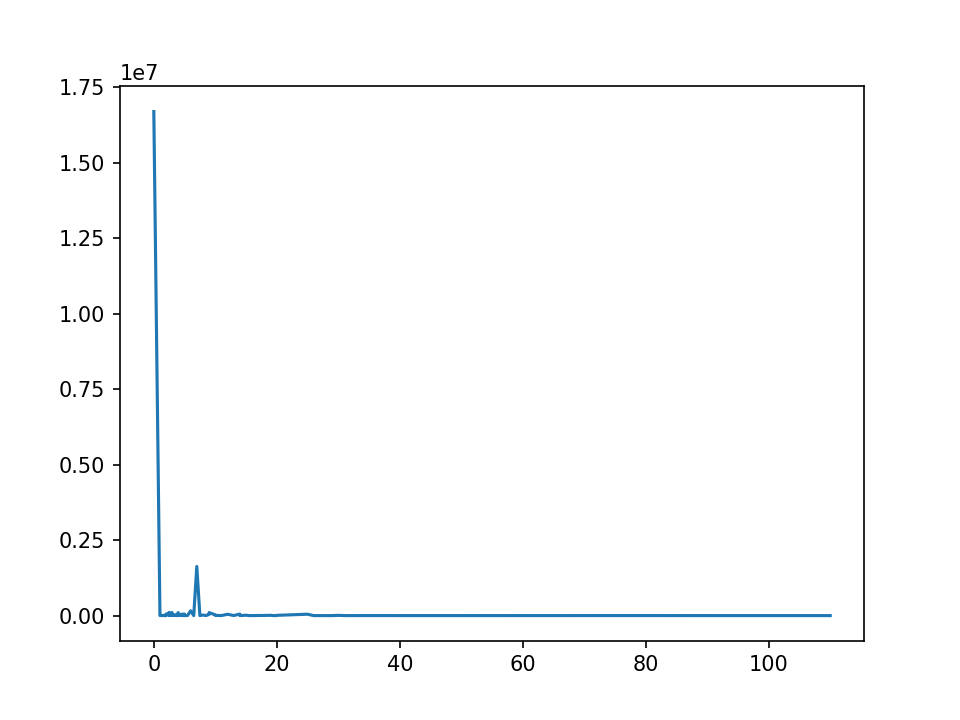

In [7]:
%matplotlib notebook
google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) # apps with multiple genres are not in this top


paid_apps = google_play_store[google_play_store['price'] != 0.0]
df1 = paid_apps.groupby("price").mean()
df2 = google_play_store.groupby("price").mean()

plt.plot(df2.index, df2['installs'])

In [8]:
#apple_store.groupby("price").mean()

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
#google_play_store.groupby("price").mean()

In [19]:
google_play_store.describe()

rating  rating_count_total  size_bytes     installs   price
count  9352.0             10822.0     10822.0      10822.0 10822.0
mean      4.2            444890.8   2282107.8   15490040.2     0.4
std       0.5           2930138.7   2764700.7   85097714.8     2.7
min       1.0                 0.0        -1.0          0.0     0.0
25%       4.0                38.0    362500.0       5000.0     0.0
50%       4.3              2107.5   1150000.0     100000.0     0.0
75%       4.5             55013.2   3250000.0    5000000.0     0.0
max       5.0          78158306.0  12500000.0 1000000000.0   110.0

In [23]:
google_play_store


app           Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook      Photo & Video   
1                                    Coloring book moana      Photo & Video   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...      Photo & Video   
3                                  Sketch - Draw & Paint      Photo & Video   
4                  Pixel Draw - Number Art Coloring Book      Photo & Video   
5                             Paper flowers instructions      Photo & Video   
6                Smoke Effect Photo Maker - Smoke Editor      Photo & Video   
7                                       Infinite Painter      Photo & Video   
8                                   Garden Coloring Book      Photo & Video   
9                          Kids Paint Free - Drawing Fun      Photo & Video   
10                               Text on Photo - Fonteee      Photo & Video   
11               Name Art Photo Editor - Focus n Filters      Photo & Video   
12                        Tattoo Name On My Photo Editor      Photo & Video   
13                                 Mandala Coloring Book      Photo & Video   
14       3D Color Pixel by Number - Sandbox Art Coloring      Photo & Video   
15                       Learn To Draw Kawaii Characters      Photo & Video   
16          Photo Designer - Write your name with shapes      Photo & Video   
17                              350 Diy Room Decor Ideas      Photo & Video   
18                         FlipaClip - Cartoon animation      Photo & Video   
19                                          ibis Paint X      Photo & Video   
20                           Logo Maker - Small Business      Photo & Video   
21             Boys Photo Editor - Six Pack & Men's Suit      Photo & Video   
22               Superheroes Wallpapers | 4K Backgrounds      Photo & Video   
23                                Mcqueen Coloring pages      Photo & Video   
24                           HD Mickey Minnie Wallpapers      Photo & Video   
25                            Harley Quinn wallpapers HD      Photo & Video   
26                         Colorfit - Drawing & Coloring      Photo & Video   
27                                 Animated Photo Editor      Photo & Video   
28                                 Pencil Sketch Drawing      Photo & Video   
29                       Easy Realistic Drawing Tutorial      Photo & Video   
30                        Pink Silver Bow Keyboard Theme      Photo & Video   
31                                     Art Drawing Ideas      Photo & Video   
32                             Anime Manga Coloring Book      Photo & Video   
33                                    Easy Origami Ideas      Photo & Video   
34                                       I Creative Idea      Photo & Video   
35                      How to draw Ladybug and Cat Noir      Photo & Video   
36        UNICORN - Color By Number & Pixel Art Coloring      Photo & Video   
37                                    Floor Plan Creator      Photo & Video   
38                        PIP Camera - PIP Collage Maker      Photo & Video   
39         How To Color Disney Princess - Coloring Pages      Photo & Video   
40                         Drawing Clothes Fashion Ideas      Photo & Video   
41                          Sad Poetry Photo Frames 2018      Photo & Video   
42                            Textgram - write on photos      Photo & Video   
43                                         Paint Splash!      Photo & Video   
44           Popsicle Sticks and Similar DIY Craft Ideas      Photo & Video   
45     Canva: Poster, banner, card maker & graphic de...      Photo & Video   
46     Install images with music to make video withou...      Photo & Video   
47                 Little Teddy Bear Colouring Book Game      Photo & Video   
48                                      How To Draw Food      Photo & Video   
49                           Monster Truck Stunt 3D 2019          Lifestyle   
50                      

In [12]:
apple_store.describe()

size_bytes  price  rating_count_tot  rating_count_ver  user_rating  \
count       7197.0 7197.0            7197.0            7197.0       7197.0   
mean   199134453.8    1.7           12892.9             460.4          3.5   
std    359206913.5    5.8           75739.4            3920.5          1.5   
min       589824.0    0.0               0.0               0.0          0.0   
25%     46922752.0    0.0              28.0               1.0          3.5   
50%     97153024.0    0.0             300.0              23.0          4.0   
75%    181924864.0    2.0            2793.0             140.0          4.5   
max   4025969664.0  300.0         2974676.0          177050.0          5.0   

       user_rating_ver  sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
count           7197.0           7197.0           7197.0    7197.0   7197.0  
mean               3.3             37.4              3.7       5.4      1.0  
std                1.8              3.7              2.0       7.9      0.1  
min                0.0              9.0              0.0       0.0      0.0  
25%                2.5             37.0              3.0       1.0      1.0  
50%                4.0             37.0              5.0       1.0      1.0  
75%                4.5             38.0              5.0       8.0      1.0  
max                5.0             47.0              5.0      75.0      1.0

In [22]:
apple_store.size

107955

In [13]:
#apple_store.isnull().sum()

In [14]:
#google_play_store.isnull().sum()

In [15]:
#google_play_store.hist()

In [16]:
#apple_store.prime_genre.unique()

#apple_store.sort_values(by='prime_genre', ascending=True)

sorted(apple_store.prime_genre.unique())

['Books & Reference',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [37]:
#google_play_store['Category'].unique()

#google_play_store.sort_values(by='Category', ascending=True)

sorted(google_play_store['Category'].unique())

['Books & Reference',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [18]:
#google_play_store['Genres'].unique()

In [48]:
#TODO
# create train & test data
# Google :By genre/category and price predict reiting and install count
# Appstore 

categories = sorted(google_play_store['Category'].unique())
dictOfWords = { categories[i] : float(i) for i in range(len(categories) ) }
reverseDict = { float(i) : categories[i] for i in range(len(categories) ) }

gps = google_play_store.copy()
for each in range(len(gps['Category'])):
    gps.Category.iloc[each] = dictOfWords.get(gps.Category.iloc[each])

X = gps[['Category', 'price']]
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0)
print(y_test.size ) 

3247


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
lr_model = LogisticRegression().fit(X_train, y_train)
lr_mode = LogisticRegression().fit(x_train, z_train)
predR = lr_model.predict(X_test)



print("RMSE: {}".fromat(np.sqr(mean_squared_error(y_test, pred))))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').